In [1]:
%load_ext autoreload
%autoreload 2

import sys
import pandas
sys.path.append("..")
#import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings
from numpy import random
from matplotlib import cm
#from matplotlib import norm
from matplotlib.colors import TwoSlopeNorm
warnings.filterwarnings('ignore')
import os

datadir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_Relaxation/Data/'
datadirAlt  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_MonomerMeasurements/Data/'
plotsdir  = '/Users/billiemeadowcroft/Dropbox/PhDGithub/RemoteCollagenIV/Data_and_Figures/RicardoInVivoTurnover/Fig_Relaxation/Plots/'

import sys

# Check the current recursion limit
current_limit = sys.getrecursionlimit()
print("Current recursion limit:", current_limit)

# Increase the recursion limit
sys.setrecursionlimit(6000)

Current recursion limit: 3000


In [2]:
def phiform(phi0,phi_inf,tau,t):
    if tau==0:
        phi = phi_inf
    else:
        phi = (phi0)*np.exp(-t/tau)+phi_inf
    return phi

def intersection(y,y0):
    diff = []
    for i in range(len(y)):
        diff.append(float((y[i]-y0)*(y[i]-y0)))
    diff2 = sorted(diff)
    x = diff.index(diff2[0])
    return x,diff[x]

In [3]:
cmap0 = plt.cm.get_cmap('YlOrBr') #YlOrBr
clrs1= ['#edf8b1','#7fcdbb','#2c7fb8']
clrs2=['#f7fcb9','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['#e7e1ef','#c994c7','#dd1c77']

clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84','dimgrey']
#clrs_5 = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494']
clrs1= ['grey','#7fcdbb','#2c7fb8']
clrs2=['grey','#addd8e','#31a354']
#clrs2= ['#ece2f0','#a6bddb','#1c9099']
clrs3 = ['grey','#c994c7','#dd1c77']
clrs_div = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
clrrrs=[clrs1,clrs3,clrs2]

#'YlOrBr'
ClrsRici = ["#96a2c1ff","#999ebeff","#a697baff","#b795afff","#c996a8ff","#d398a5ff"]
ClrsRici = ["#7883acff","#3e387bff","#73457aff","#a66181ff","#b25268ff","#d49995ff"]
ClrsRiciChosen = ClrsRici #["#7883acff","#73457aff","#b25268ff","#d49995ff"]
ClrsOrange = ["#fed98e","#fe9929","#d95f0e","#993404"]

[22.73729083174024, 33.89277957831213, 44.54559159156487, 62.49698463669615, 100.25982355444269, 264.83128160509943]


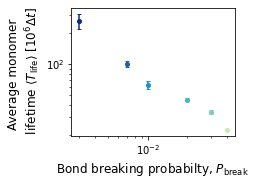

In [6]:
fig2,ax2 = plt.subplots(1,figsize = (3.5,2.6))

f=3
MP = "0.12 0.1 0.06 0.03 0.02 0.01".split() # ORIGINAL RANGE  0.12 0.1 0.06 0.03 0.02 0.01
BP = "0.04 0.03 0.02 0.01 0.007 0.003".split() # ORIGINAL RANGE 0.04 0.03 0.02 0.01 0.007 0.003
seeds= "1 2 3".split()
BPsV = [0.04,0.03,0.02,0.01,0.007,0.003]
AvTmonlife = []
StdTmonlife = []
AvLargestComps = []
for f in range(len(MP)):
    IndividualT_MonRelase = []
    LargestCompsEnd = []
    Tmonlife = []
    for s in range(len(seeds)):
        RateMons = []
        RateMonsRel = []
        RateMonsInc = []
        #Time NumMons RateMons LargestComp
        filename = 'monomerdata_BP'+BP[f]+'_S'+seeds[s]+'.dat'
        MonData = pandas.read_csv(datadirAlt+filename, header = 'infer',sep=' ')
        Time_ = MonData.Time
        NumMons_ = MonData.NumMons
        RateMons_ = MonData.RateMons
        LargestComp_ = MonData.LargestComp
        Time,NumMons,RateMons,LargestComp =Time_.values,NumMons_.values,RateMons_.values,LargestComp_.values
        if len(Time)>0:
            if Time[-1] >1.4e6:
                #for tt in range(len(Time)-1):
                #    RateMons.append((NumMons[tt+1]-NumMons[tt])/(Time[tt+1]-Time[tt]))
                AvNumMons = np.mean(NumMons[int(len(RateMons)/2):])
                NumInNetwork = 6330-AvNumMons
                AverageT_MonRelease = np.divide(1,np.mean(np.abs(RateMons[int(len(RateMons)/2):])))
                IndividualT_MonRelase.append(np.divide(AverageT_MonRelease * NumInNetwork,10**6))

                N=6
                rollingRatAv = np.convolve(np.abs(np.ravel(RateMons)), np.ones(N)/N, mode='valid')
                timeRol = Time[int(N/2)+1:-int(N/2-1)]
                idx = (np.abs(Time - 1509600)).argmin()
                LargestCompsEnd.append(LargestComp[idx])
                Tmonlife.append(IndividualT_MonRelase)
    AvTmonlife.append(np.mean(Tmonlife))
    StdTmonlife.append(np.std(Tmonlife))
    AvLargestComps.append(np.mean(LargestCompsEnd))
    ax2.errorbar(BPsV[f],np.mean(IndividualT_MonRelase),yerr = np.std(IndividualT_MonRelase),capsize = 2,color = clrs_5[f],marker = 'o',markersize = 4) ##Would this by x2??
    #ax2.plot(BPsV[f],np.divide(np.mean(IndividualT_MonRelase),10**6),color = clrs_5[f],marker = 'o',markersize = 10) ##Would this by x2??
    #print(MP[f],np.mean(IndividualT_MonRelase),np.std(IndividualT_MonRelase))
#ax[2].set_ylabel("Free monomer lifetime",fontsize = 12)
ax2.set_ylabel("Average monomer \n lifetime"+r" $ \langle T_{\mathrm{life}}\rangle$ [$10^6\Delta t$]",fontsize = 12)
ax2.set_xlabel("Bond breaking probabilty, $P_{\mathrm{break}}$",fontsize = 12)
#ax2.set_yscale('log')
#ax2.set_yticks([0,100,200,300],['0','100','200','300'])
#ax2.set_ylim([0,350])
print(AvTmonlife)
fig2.tight_layout()

ax2.set_yscale('log')
ax2.set_xscale('log')
#ax.set_ylim([70,100])
plotname = "EquilibriumMaster.pdf"
#fig.savefig(plotsdir+plotname)

plotname2 = "MonomerExchangeMaster.pdf"
#fig2.savefig(plotsdir+plotname2)
##plotname = "Equilibration_quants.pdf"


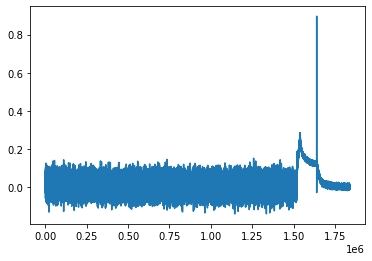

In [7]:
filename = 'stressdata_BP0.02.dat'
StressData = pandas.read_csv(datadir+filename, header = 'infer',sep=' ')
Time = StressData.Time
Stress = StressData.stressAv
fig,ax = plt.subplots()
ax.plot(Time,Stress)

100521
100521


KeyError: 8676

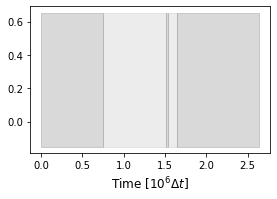

In [20]:
fig,ax = plt.subplots(1,figsize = (4.3,2.7))


xstretches = "51 76".split()
MPs = "0.1 0.03 0.01".split()
BPs = "0.03 0.01 0.003".split()
seeds1 = "1 2 3".split()
seeds2  = "1 3".split()


lenT0 = 75922
lenT1 = 3272
MPs = "0.12 0.1 0.06 0.03 0.02 0.01".split()
BPs = "0.04 0.03 0.02 0.01 0.007 0.003".split()
seeds1 = "1 2 3".split()
seeds2  = "1 3".split()


timeFactor = 10**6
#t_Eq = (1509600*0.5)/timeFactor
#t_MT = (1509600*0.5)/timeFactor +t_Eq
#endOfEq = 1509600
#t_strain = ((20000+10000)/timeFactor)+t_MT
#t_InitRel = 10000*10/timeFactor+t_strain
#t_addmons = 1000/timeFactor +t_InitRel
#t_FulLRel = 1000000/timeFactor+t_InitRel

times = [0,t_Eq,t_MT,t_strain,t_InitRel,t_FulLRel]
#strains=[0,0,0,100,100,100]
UP,LW=-0.15,0.65
#ax.plot(times,strains,linestyle = '-',color = 'black')
ax.fill_between([0,t_Eq],[LW,LW],[UP,UP],alpha = 0.15,color = 'black')
ax.fill_between([t_MT,t_strain],[LW,LW],[UP,UP],alpha = 0.15,color = 'black')
ax.fill_between([t_Eq,t_MT],[LW,LW],[UP,UP],alpha = 0.15,color = 'grey')
ax.fill_between([t_strain,t_InitRel],[LW,LW],[UP,UP],alpha = 0.15,color = 'grey')
ax.fill_between([t_InitRel,t_FulLRel],[LW,LW],[UP,UP],alpha = 0.15,color = 'black')
xstretches = "51 76".split()
x=1
#ax.set_ylabel("% applied x-y strain",fontsize =12)
ax.set_xlabel('Time [$10^{6}\Delta t$]',fontsize = 12)
#ax.set_xlim([-0.1,t_FulLRel+0.1])
#TmonAv = np.divide([64,100,330],10)
#22.8555011732714, 33.89276760171024, 44.545528358176234, 62.49702830973359, 100.25979092931783, 264.8313782857122
#TmonAv = [2,3,4,6,10,26]
#TmonAv = [3,6,26]
#Tmonstd = np.divide([3.571501191030219,5.480583457304206,13.19089058082929],10)
mrks = [":","-","--"]
alphs = [0.5,0.5,0.5]
Avtaus = []
Stdtaus = []

x=1
Vol1 = 51*51*12
Vol2 = (51+int(xstretches[x]))*(51+int(xstretches[x]))*12-Vol1
for p in range(len(MPs)):
    filename = 'stressdata_BP'+BP[p]+'.dat'
    
    StressData = pandas.read_csv(datadir+filename, header = 'infer',sep=' ')
    Time_ = StressData.Time
    stressTotAv_ = StressData.stressAv
    stressTotAv = stressTotAv_.values
            
            #endOfEq = 1509600
            #tstretch = 20000+10000+endOfEq #+1509600
            #trelax = 10000*10
           

            #stressTotSum.append(stressTot)
            #N=50
            #timeAv = Time[int(N/2):-int(N/2-1)]
    rollingAvRelax = np.convolve(stressTotAv[lenT0+lenT1:], np.ones(N)/N, mode='valid')
    timePostStretch = np.add(Time[lenT0+lenT1:],-Time[lenT0+lenT1])[int(N/2):-int(N/2-1)]
    stressPostStretch = rollingAvRelax
    print(len(timePostStretch))
    print(len(stressPostStretch))
    
                # Add 1 fitting curve? 
    phi_inf = 0
    phi0 = stressPostStretch[10]
    phiTau = phi0/np.exp(1)
    tau = timePostStretch[intersection(stressPostStretch,phiTau)[0]]
             #   tauss.append(tau)
             #   print(tauss,Time[0],Time[-1])
               
        #stressTotAv = np.mean(stressTotSum,axis=0)
    ax.plot(np.divide(Time,timeFactor),stressTotAv,color = ClrsRiciChosen[p],alpha =0.3)
    print(len(stressTotAv))
    ax.plot(np.divide(Time[lenT0+lenT1:],timeFactor),stressTotAv[lenT0+lenT1:],color = 'black',alpha =0.3)
    N=50
    rollingAv = np.convolve(stressTotAv, np.ones(N)/N, mode='valid')
        #rollingAvY = np.convolve(stressY, np.ones(N)/N, mode='valid')
    timeAv = Time[int(N/2):-int(N/2-1)]
            
    ax.plot(np.divide(timeAv,timeFactor),rollingAv,color = ClrsRiciChosen[p],linestyle = '-')
        


ax.set_ylabel(r'Stress, $\sigma_{xx}+\sigma_{yy}~[k_{\mathrm{B}}/\sigma^{3}]$',fontsize = 12)
ax.set_xlim([1.2,1.85])
ax.set_ylim([-0.12,0.5])
ax.legend(frameon=False,loc = [0.01,0.43],fontsize = 9)
fig.tight_layout()
plotname = "Stress_relaxation.pdf"
#fig.savefig(plotsdir + plotname)

In [ ]:
else:
            ax.plot(np.divide(timeAv,timeFactor),rollingAv,color = ClrsRiciChosen[p],linestyle = '-')
        if i==2:
            Avtaus.append(np.mean(tauss))
            Stdtaus.append(np.std(tauss))
            timePostStretch = np.add(timeAv,-tstretch-trelax)
            stressPostStretch = rollingAv

            # Add 1 fitting curve? 
            phi_inf = 0
            phi0 = stressPostStretch[10]
            phiTau = phi0/np.exp(1)
            
            tau = timePostStretch[intersection(stressPostStretch,phiTau)[0]]
            phiTheory = []
            for tt in range(len(timePostStretch)):
                t = timePostStretch[tt]
                phiTheory.append(phiform(phi0,phi_inf,tau,t))
            if p==2:
                ax.plot(np.divide(np.add(timePostStretch,tstretch+trelax),timeFactor),phiTheory,linestyle = ':',color = 'black',label = 'Exponential fit')
            else:
                ax.plot(np.divide(np.add(timePostStretch,tstretch+trelax),timeFactor),phiTheory,linestyle = ':',color = 'black')
            #ax.plot([np.divide(np.add(tauss[0],tstretch+trelax),timeFactor),np.divide(np.add(tauss[0],tstretch+trelax),timeFactor)],[-0.1,0.4],linestyle = ':',color = ClrsRici[p*2])
            #ax.plot([np.divide(np.add(tauss[1],tstretch+trelax),timeFactor),np.divide(np.add(tauss[1],tstretch+trelax),timeFactor)],[-0.1,0.4],linestyle = ':',color = ClrsRici[p*2])
    

## Plotting master T Vs T plot

LC 0.9112164296998421
0.7040547656661404
LC 0.9404949973670352
0.8016499912234509
LC 0.9369141653501843
0.7897138845006146
LC 0.9429173249078463
0.8097244163594879
LC 0.9592417061611375
0.8641390205371251
LC 0.9765139547130068
0.9217131823766896


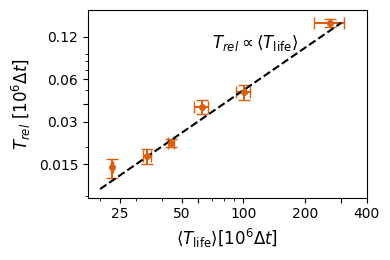

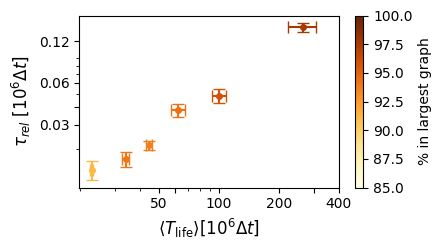

In [32]:
fig,ax = plt.subplots(1,figsize = (4.,2.7))

#y=mc+c
#0.15*20000 [0.01,0.15]

ax.errorbar(AvTmonlife,np.divide(Avtaus,10**6),xerr = StdTmonlife,yerr = np.divide(Stdtaus,10**6),color = ClrsOrange[2],linestyle = '',marker = 'o',markersize = 4,capsize = 4)
ax.plot([20,300],[0.0005*20,0.0005*300],linestyle = '--',color = 'black') #ClrsOrange[3])
ax.set_xlabel(r'$\langle T_{\mathrm{life}}\rangle [10^6\Delta t]$',fontsize = 12)
ax.set_ylabel(r"$T_{\mathrm{rel}}$ [$10^6\Delta t$]",fontsize = 12)

text = r'$\tau_{rel} = 5\cdot 10^{-4}\langle T_{\mathrm{life}}\rangle$'
text = r'$T_{\mathrm{rel}} \propto \langle T_{\mathrm{life}}\rangle$'
ax.text(70,0.1,text,color = 'black',fontsize = 12)
#---- log-log axis---#
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks([25,50,60,100,200,300,400],['25','50','','100','200','','400'])
ax.set_yticks([0.015,0.03,0.04,0.06,0.12],['0.015','0.03','','0.06','0.12'])
#---- normal axis ----#
#ax.set_xticks([100,200,300,400],['100','200','300','400'])
#ax.set_yticks([0.05,0.1,0.15],['0.05','0.1','0.15'])

fig.tight_layout()
plotname = 'Master_tau_vs_Tlife.pdf'
fig.savefig(plotsdir+plotname)

LargestComp = np.divide(AvLargestComps,6330)
#print(LargestComp-)
norm = TwoSlopeNorm(vmin=85, vcenter=92.5,vmax=100)
fig2,ax2 = plt.subplots(1,figsize = (4.5,2.6))
for i in range(len(Avtaus)):
    ax2.errorbar(AvTmonlife[i],np.divide(Avtaus[i],10**6),xerr = StdTmonlife[i],yerr = np.divide(Stdtaus[i],10**6),color =cmap0((LargestComp[i]-0.85)/(0.15)), linestyle = '',marker = 'o',markersize = 4,capsize = 4)
    print("LC",LargestComp[i])
    print((LargestComp[i]-0.7)/(0.3))
ax2.set_xlabel(r'$\langle T_{\mathrm{life}}\rangle [10^6\Delta t]$',fontsize = 12)
ax2.set_ylabel(r"$\tau_{rel}$ [$10^6\Delta t$]",fontsize = 12)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks([50,60,100,200,300,400],['50','','100','200','','400'])
ax2.set_yticks([0.03,0.04,0.06,0.12],['0.03','','0.06','0.12'])
fig2.show()
fig2.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap0),ax=ax2, label = '% in largest graph')
fig2.tight_layout()

#fig2.savefig(plotsdir+plotname2)

LC 0.9112164296998421
0.7040547656661404
LC 0.9404949973670352
0.8016499912234509
LC 0.9369141653501843
0.7897138845006146
LC 0.9429173249078463
0.8097244163594879
LC 0.9592417061611375
0.8641390205371251
LC 0.9765139547130068
0.9217131823766896


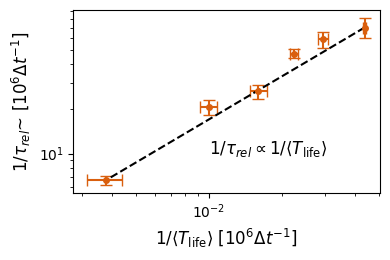

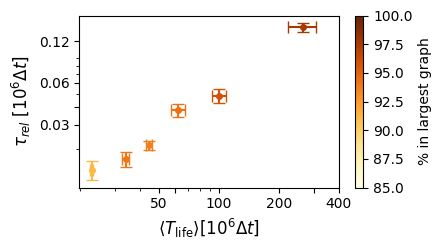

In [30]:
fig,ax = plt.subplots(1,figsize = (4.,2.7))

#y=mc+c
#0.15*20000 [0.01,0.15]
PercErrX = np.divide((StdTmonlife),np.multiply(AvTmonlife,AvTmonlife))
PercErrY = np.divide(np.divide(Stdtaus,10**6),np.multiply(np.divide(Avtaus,10**6),np.divide(Avtaus,10**6)))
#ax.errorbar(np.divide(1,AvTmonlife),np.divide(1,np.divide(Avtaus,10**6)),xerr = np.divide(1,StdTmonlife),yerr = np.divide(1,np.divide(Stdtaus,10**6)),color = ClrsOrange[2],linestyle = '',marker = 'o',markersize = 4,capsize = 4)
ax.errorbar(np.divide(1,AvTmonlife),np.divide(1,np.divide(Avtaus,10**6)),xerr=PercErrX,yerr=PercErrY,color = ClrsOrange[2],linestyle = '',marker = 'o',markersize = 4,capsize = 4)
ax.plot([np.divide(1,AvTmonlife[0]),np.divide(1,AvTmonlife[-1])],[np.divide(1,np.divide(Avtaus[0],10**6)),np.divide(1,np.divide(Avtaus[-1],10**6))],linestyle = '--',color = 'black') #ClrsOrange[3])
ax.set_xlabel(r'$1/\langle T_{\mathrm{life}}\rangle ~[10^6\Delta t^{-1}]$',fontsize = 12)
ax.set_ylabel(r"$1/\tau_{rel}$~ [$10^6\Delta t^{-1}$]",fontsize = 12)

text = r'$1/\tau_{rel} = 5\cdot 10^{-4}1/\langle T_{\mathrm{life}}\rangle$'
text = r'$1/\tau_{rel} \propto 1/\langle T_{\mathrm{life}}\rangle$'
ax.text(0.01,10,text,color = 'black',fontsize = 12)
#---- log-log axis---#
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_xticks([25,50,60,100,200,300,400],['25','50','','100','200','','400'])
#ax.set_yticks([0.015,0.03,0.04,0.06,0.12],['0.015','0.03','','0.06','0.12'])
#---- normal axis ----#
#ax.set_xticks([100,200,300,400],['100','200','300','400'])
#ax.set_yticks([0.05,0.1,0.15],['0.05','0.1','0.15'])

fig.tight_layout()
plotname = 'Master_1Ovatau_vs_1OvaTlife.pdf'
fig.savefig(plotsdir+plotname)

LargestComp = np.divide(AvLargestComps,6330)
#print(LargestComp-)
norm = TwoSlopeNorm(vmin=85, vcenter=92.5,vmax=100)
fig2,ax2 = plt.subplots(1,figsize = (4.5,2.6))
for i in range(len(Avtaus)):
    ax2.errorbar(AvTmonlife[i],np.divide(Avtaus[i],10**6),xerr = StdTmonlife[i],yerr = np.divide(Stdtaus[i],10**6),color =cmap0((LargestComp[i]-0.85)/(0.15)), linestyle = '',marker = 'o',markersize = 4,capsize = 4)
    print("LC",LargestComp[i])
    print((LargestComp[i]-0.7)/(0.3))
ax2.set_xlabel(r'$\langle T_{\mathrm{life}}\rangle [10^6\Delta t]$',fontsize = 12)
ax2.set_ylabel(r"$\tau_{rel}$ [$10^6\Delta t$]",fontsize = 12)

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks([50,60,100,200,300,400],['50','','100','200','','400'])
ax2.set_yticks([0.03,0.04,0.06,0.12],['0.03','','0.06','0.12'])
fig2.show()
fig2.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap0),ax=ax2, label = '% in largest graph')
fig2.tight_layout()

#fig2.savefig(plotsdir+plotname2)

In [ ]:
fig2,ax2 = plt.subplots(1,figsize = (5,3))
fig3,ax3 = plt.subplots(1,figsize = (4,3))
ax2.set_ylabel(r"$\tau_{rel}$ [$\Delta t$]",fontsize = 12)
ax2.set_xlabel(r"$T_{\mathrm{exchange}}^{\mathrm{monomer}}$ [$\Delta t$]",fontsize = 12)
ax3.set_ylabel(r"$\tau_{rel}$ [$\Delta t$]",fontsize = 12)
ax3.set_xlabel(r"$T_{\mathrm{exchange}}^{\mathrm{monomer}}$ [$\Delta t$]",fontsize = 12)
#ax2.plot(RateMonsAll,taus[0,:],color = clrs2[1],marker = 's',markersize = 6,linestyle = '-',label ='x-y strain = 50%')
for i in range(len(RateMonsAll)):
    ax2.plot(RateMonsAll[i],taus[1,i],color = cmap0(LargestCompAtEnd[i]),marker = 'o',linestyle = '-')
ax3.plot(RateMonsAll,taus[1,:],color = clrs2[2],marker = 'o',linestyle = '-')
ax2.set_xscale('log')
ax3.set_xscale('log')
print(LargestCompAtEnd)
ax2.set_xticks([3000,10000,30000],['3000','10000','30000'])
ax2.legend(frameon=False,fontsize = 10,loc = [0.05,0.75])
ax3.set_xticks([3000,10000,30000],['3000','10000','30000'])
ax3.legend(frameon=False,fontsize = 10,loc = [0.05,0.75])
#ax2.set_yscale('log')
i=0
norm = TwoSlopeNorm(vmin=0, vcenter=50,vmax=100)
fig2.show()
fig2.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap0),ax=ax2, label = '% in largest graph')
fig2.tight_layout()
fig3.tight_layout()


#plotname2 = "RelaxationTimeVsExchange_100percent.pdf"

36 MP0.15_BP0.05
0 0 0 0.13238042711778503
1920020
40000
1 0 0 0.13238042711778503
2 0 0 0.13238042711778503
72 MP0.15_BP0.05
0 1 0 0.13238042711778503
1920020
40000
1 1 0 0.13238042711778503
2 1 0 0.13238042711778503
108 MP0.15_BP0.05
0 2 0 0.13238042711778503
1920020
40000
1 2 0 0.13238042711778503
2 2 0 0.13238042711778503
36 MP0.12_BP0.04
0 0 1 0.1215115716136595
1644720
40000
1 0 1 0.1215115716136595
2 0 1 0.1215115716136595
72 MP0.12_BP0.04
0 1 1 0.1215115716136595
1644720
40000
1 1 1 0.1215115716136595
2 1 1 0.1215115716136595
108 MP0.12_BP0.04
0 2 1 0.1215115716136595
1644720
40000
1 2 1 0.1215115716136595
2 2 1 0.1215115716136595
36 MP0.1_BP0.03
0 0 2 0.13215821742961387
2010000
40000
1 0 2 0.13215821742961387
2 0 2 0.13215821742961387
72 MP0.1_BP0.03
0 1 2 0.13215821742961387
2010000
40000
1 1 2 0.13215821742961387
2 1 2 0.13215821742961387
108 MP0.1_BP0.03
0 2 2 0.13215821742961387
2010000
40000
1 2 2 0.13215821742961387
2 2 2 0.13215821742961387
36 MP0.06_BP0.02
0 0 3 0.137

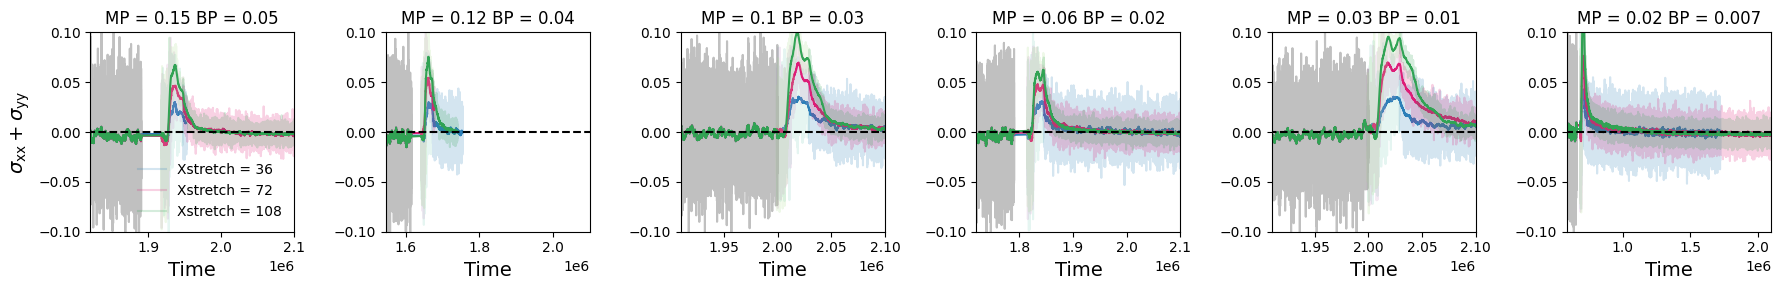

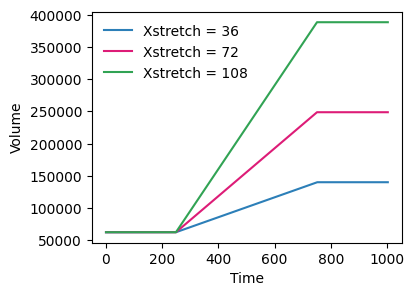

In [229]:

### Fetching stress and bond force ####

xstretches = "36 72 108".split() #36 72 108
BPs = "0.05 0.04 0.03 0.02 0.01 0.007".split() # 0.030.01 0.03 
MPs = "0.15 0.12 0.1 0.06 0.03 0.02".split() # 0.10.03 0.1 
fig,ax=plt.subplots(1,len(MPs),figsize = (3*len(MPs),3))
j=0


fig2,ax2 = plt.subplots(figsize = (4,3))
#foldernameBONDS = datadir+'runBONDprinting_tmix1e4_tbonds5e5_tstretch1e4_trelax5e5_N_fix50_XStretch108_Nev200_ChemBond6.0_prob0.05_seed'+seeds[s]+'/dumplin_bonds/'
for k in range(len(BPs)):
    datadir = datadir0+ 'MP'+MPs[k]+'_BP'+BPs[k]+'/'
    for j in range(len(xstretches)):
        print(xstretches[j]+' '+'MP'+MPs[k]+'_BP'+BPs[k])
        Vol1 = 72*72*12
        Vol2 = (72+int(xstretches[j]))*(72+int(xstretches[j]))*12-Vol1
        VolTime = []
        timeadd = 0
        fnameEquib = datadir+'Equilibrate/run_tbonds1e6_tsample1e3_N_evSamp20_N_totSamp100_XStretch108_MP'+MPs[k]+'_BP'+BPs[k]+'_MD1.5_BD2.4_seed1/'
        fnameStretch = datadir+'Stretch/run_tstretch1e4_xystretch'+xstretches[j]+'_seed1/'
        fnameRelax = datadir+'Relax/runAddMons_tbonds1e6_tsample1e3_Xstretch_'+xstretches[j]+'_N_evSamp20_N_totSamp100_MP'+MPs[k]+'_BP'+BPs[k]+'_MD1.5_BD2.4_seed1/'
        foldernames = [fnameEquib,fnameStretch,fnameRelax]
        timeTot = []
        stressTot=[]
        for i in range(len(foldernames)):
            clrs = clrrrs[j]
            #print(clrs)
            foldername = foldernames[i]
            #if k==4 and j==2 and i==2:
            #     filename = '/thermo-Copy1.dat'
            #else:
            #    filename = '/thermo.dat'
            thermo = pandas.read_csv(foldername+filename, sep = ' ', header = 'infer')
            
            #thermo2 = thermo = pandas.read_csv(foldername+'/thermo2.dat', sep = ' ', header = 'infer')
            #step etot ke pe temp press CreateNC1 CumuCreateNC1 Create7s CumuCreate7s BreakNC1 CumuBreakNC1 Break7s CumuBreak7s
            etot_, ke_, peBond_,peAngle_, temp_, press_,stressX_,stressY_,stressZ_,AvBondForce_   = thermo.etot,thermo.ke,thermo.peBond,thermo.peAngle,thermo.temp,thermo.press,thermo.stressX,thermo.stressY,thermo.stressZ,thermo.AvBondForce     
            etot, ke, peBond,peAngle, temp, press,stressX,stressY,stressZ,AvBondForce =etot_.values, ke_.values, peBond_.values,peAngle_.values, temp_.values, press_.values,stressX_.values,stressY_.values,stressZ_.values,AvBondForce_.values
            Time_ = thermo.step
            Time = Time_.values
            if i==0:
                end = 1500
            elif i==1:
                end = int(len(Time)/4)
            else:
                end=1
        
        
            if i==0:
                stressX = np.divide(stressX,Vol1)
                stressY = np.divide(stressY,Vol1)
            if i==1:
                print(Time[-1]-Time[0])
                TimeSection = (Time[-1]-Time[0])/4
                for tt in range(len(Time)):
                    if Time[tt] < Time[0]+TimeSection:
                        VolTime.append(Vol1)
                        stressX[tt] = stressX[tt]/Vol1
                        stressY[tt] = stressY[tt]/Vol1
                        tend = tt
                    elif Time[tt] < Time[0]+TimeSection*3:
                        VolAlt = (Vol1)+Vol2*(tt-tend)*2./len(Time)  #*(Time[tt]-TimeSection)/(TimeSection*2)
                        #print((tt-tend)/len(Time))
                        #print(Vol2*(Time[tt]-TimeSection)/(TimeSection*2))
                        VolTime.append(VolAlt)
                        stressX[tt] = stressX[tt]/VolAlt
                        stressY[tt] = stressY[tt]/VolAlt
                    else:
                        stressX[tt] = stressX[tt]/(Vol2+Vol1)
                        stressY[tt] = stressY[tt]/(Vol2+Vol1)
                        VolTime.append(Vol2+Vol1)
                    
            if i==2:
                stressX = np.divide(stressX,Vol2+Vol1)
                stressY = np.divide(stressY,Vol2+Vol1)
                
            if i==2:
                ax[k].plot(Time[2:-end]+timeadd,np.add(stressX[2:-end],stressY[2:-end]),alpha = 0.2,color= clrs[i],label = 'Xstretch = '+xstretches[j])
            else:
                ax[k].plot(Time[2:-end]+timeadd,np.add(stressX[2:-end],stressY[2:-end]),alpha = 0.2,color= clrs[i])

        
            for t in range(len(Time[2:-end])):
                t+=2
                timeTot.append(Time[t]+timeadd)
                stressTot.append(stressX[t]+stressY[t])
            print(i,j,k,np.max(stressTot))
            if i ==1:
                timeadd = Time[-int(len(Time)/4)]
            if i==0:
                timelimL = Time[-1] -100000
                print(Time[-1])
            if i==2:
                timelimU = Time[-1]+100000+timeadd
            timelimU = 2100000
       # ax[k].set_xlim([1900000,2500000])
        ax[k].set_ylim([-0.1,0.1])
        ax[k].set_title('MP = '+MPs[k]+' BP = '+BPs[k])
        if k==0:
            ax2.plot(VolTime,color= clrs[i],label = 'Xstretch = '+xstretches[j])
        #ax[1].plot(timeTot,stressTot,alpha = 0.5,color = clrs[1])
        N=100
        rollingAv = np.convolve(stressTot, np.ones(N)/N, mode='valid')
        ax[k].plot(timeTot[int(N/2):-int(N/2-1)],rollingAv,alpha = 1,linestyle = '-',color = clrs[2])
        #ax[k].set_ylim([-0.15,0.15])
        ax[k].set_xlim([timelimL,timelimU])
    ax[k].set_xlabel('Time',fontsize = 14)
    ax[k].plot([0,2200000],[0,0],linestyle = '--',color = 'black')
ax[0].set_ylabel(r'$\sigma_{\mathrm{xx}}+\sigma_{\mathrm{yy}}$',fontsize = 14)
ax[0].legend(frameon=False)

fig.tight_layout()

ax2.set_ylabel('Volume')
ax2.set_xlabel('Time')
ax2.legend(frameon=False)


In [ ]:
def dfs(graph, start, visited):
    visited.add(start)
    count = 1  # Count the starting node
    for neighbor in graph[start]:
        if neighbor not in visited:
            count += dfs(graph, neighbor, visited)  # Add count from neighbors
    return count

def build_graph(edges):
    graph = {}
    for edge in edges:
        a, b = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        graph[a].append(b)
        graph[b].append(a)  # Omit this line for a directed graph
    return graph

def build_graphWithTypes(edges,T):
    graph = {}
    i==0
    for edge in edges:
        a, b, t = edge
        if a not in graph:
            graph[a] = []
        if b not in graph:
            graph[b] = []
        if t==T:
            graph[a].append(b)
            graph[b].append(a)  # Omit this line for a directed graph
    return graph

def largest_connected_component(graph):
    visited = set()
    largest = 0
    for node in graph:
        if node not in visited:
            size = dfs(graph, node, visited)
            largest = max(largest, size)
    return largest

def is_connected(graph, nodes):
    visited = set()
    dfs(graph, next(iter(graph)), visited)
    return len(visited) == len(nodes)

def find_connected_components(graph, nodes):
    visited = set()
    num_components = 0
    for node in nodes:
        if node not in visited:
            dfs(graph, node, visited)
            num_components += 1
    return num_components
    
def calculate_average_degree(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graph)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree

def calculate_average_degree7sNc1(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graph)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree

In [240]:
def collapse_network(edges):
    # Step 1: Identify and merge nodes connected by type '1' edges
    to_merge = [edge[:2] for edge in edges if edge[2] == 1]  # Pairs to merge
    #print(len(to_merge))
    merged_nodes = {}  # Maps original nodes to their new merged node
    new_node_id = 0
    for a, b in to_merge:
        # Find or set the merged node ID for both nodes
        merged_a = merged_nodes.get(a, new_node_id)
        merged_b = merged_nodes.get(b, None)
        if merged_b is None:
            merged_nodes[a] = merged_a
            merged_nodes[b] = merged_a
            new_node_id += 1
        elif merged_a != merged_b:
            # Update all nodes that were merged into b to now be merged into a
            for node, merged_id in merged_nodes.items():
                if merged_id == merged_b:
                    merged_nodes[node] = merged_a
    #print(len(merged_nodes))
    new_nodes_set = set(merged_nodes.values())  # Merged nodes
    for node in edges:
        if node[0] not in merged_nodes:
            new_nodes_set.add(node[0])  # Add unmerged nodes
        if node[1] not in merged_nodes:
            new_nodes_set.add(node[1])
    # Step 2: Reconstruct the graph with merged nodes and updated edges
    new_edges = set()
    
    for a, b, t in edges:
        #if t == 2:  # Only consider type '2' edges for reconnection
        new_a = merged_nodes.get(a, a)  # Get merged node or original
        new_b = merged_nodes.get(b, b)
        if new_a != new_b:  # Avoid self-loops
            new_edges.add((new_a, new_b))    #, t))

    return list(new_edges)   #, list(new_nodes_set)

In [ ]:
def calculate_average_degree(graph):
    total_degrees = sum(len(neighbors) for neighbors in graph.values())
    num_nodes = len(graphT)
    #print(num_nodes)
    average_degree = total_degrees / num_nodes if num_nodes else 0
    return average_degree




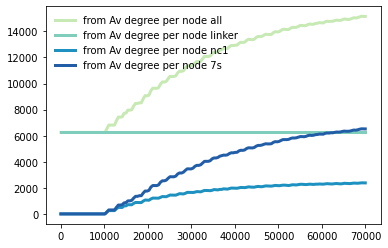

In [254]:
fig,ax = plt.subplots()

ax.plot(timeNR,np.multiply(AvDegreeNR,6250),color = clrs3[0],linewidth = 3,label = "from Av degree per node all")
ax.plot(timeNR,np.multiply(AvDegreeNR1,6250),color = clrs3[1],linewidth = 3,label = "from Av degree per node linker")
ax.plot(timeNR,np.multiply(AvDegreeNR2,6250),color = clrs3[2],linewidth = 3,label = "from Av degree per node nc1")
ax.plot(timeNR,np.multiply(AvDegreeNR3,6250),color = clrs3[3],linewidth = 3,label = "from Av degree per node 7s")
ax.legend(frameon=False)
